# Assignment 5: Implement multivariable linear regression & KNN Regression in the given dataset. Check the accuracy,mse,mae of both algorithms & make a barplot using these things.

## Importing Important Libraries

In [239]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from IPython.display import Image
from matplotlib import pyplot as plt
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, RocCurveDisplay, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")

## How The Data Looks Like!

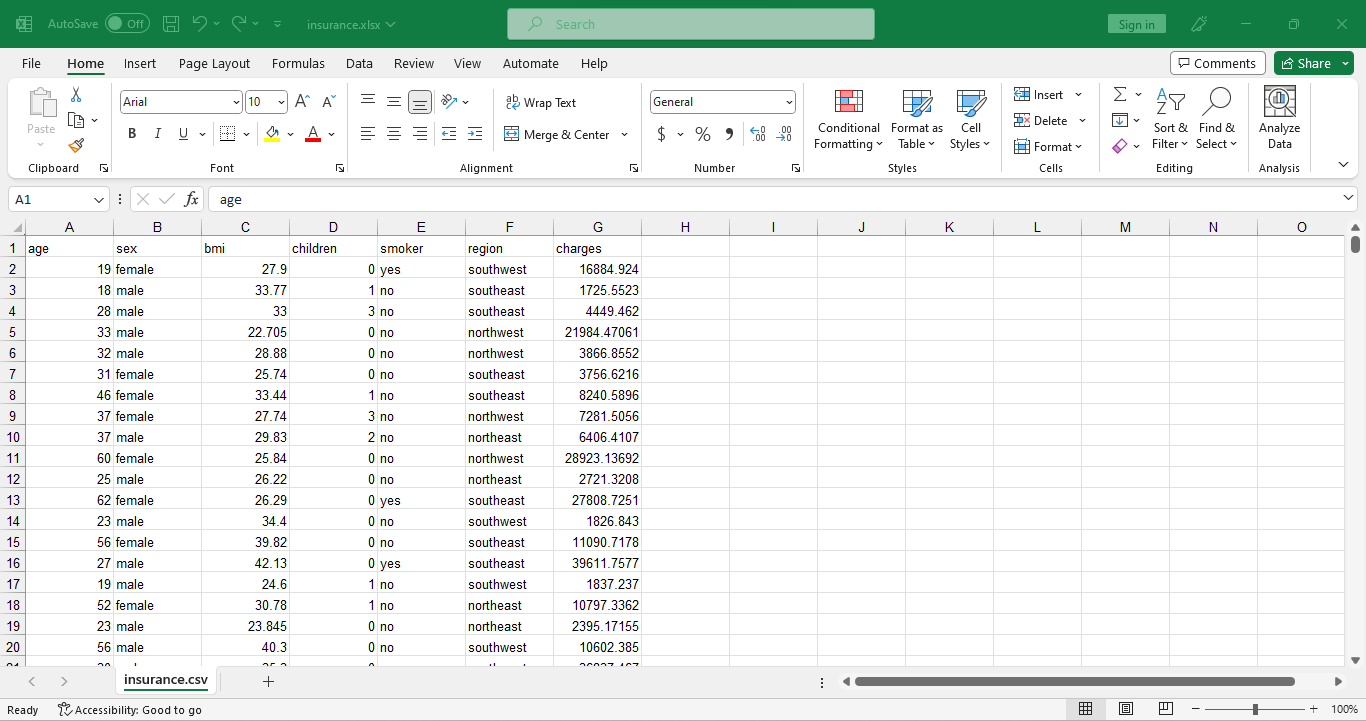

In [240]:
Image('data.png')

## Data Analysis

In [241]:
df = pd.read_excel('insurance.xlsx')

In [242]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [243]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [244]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [246]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [247]:
df.shape

(1338, 7)

In [248]:
df.corr(numeric_only = True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [249]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [250]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Implementing Label Encoding

In [251]:
le = LabelEncoder()

In [252]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    else:
        df[col] = le.fit_transform(df[col])

In [253]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Scaling

In [254]:
mm = MinMaxScaler()

In [255]:
df['charges'] = mm.fit_transform(df[['charges']])

In [256]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,0.251611
1,18,1,33.770,1,0,2,0.009636
2,28,1,33.000,3,0,2,0.053115
3,33,1,22.705,0,0,1,0.333010
4,32,1,28.880,0,0,1,0.043816


## Training The Data Frame

In [257]:
x = df.drop('charges', axis = 1)
y = df['charges']

In [258]:
xtrain, xtest, ytrain, ytest = tts(x, y, test_size = 0.3, random_state = 78)

## Analyzing The Trained Data

In [259]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((936, 6), (402, 6), (936,), (402,))

In [260]:
xtrain.head()

,age,sex,bmi,children,smoker,region
62,64,1,24.700,1,0,1
861,38,0,28.000,3,0,3
973,19,0,40.500,0,0,3
209,40,1,41.230,1,0,0
849,55,1,32.775,0,0,1


In [261]:
xtest.head()

,age,sex,bmi,children,smoker,region
160,42,0,26.600,0,1,1
1326,42,0,32.870,0,0,0
544,54,1,30.210,0,0,1
624,59,1,28.785,0,0,1
914,33,1,24.605,2,0,1


In [262]:
ytrain.head()

62     0.463614
861    0.096239
973    0.010175
209    0.087604
849    0.151316
Name: charges, dtype: float64

In [263]:
ytest.head()

160     0.322862
1326    0.094625
544     0.145408
624     0.175706
914     0.066013
Name: charges, dtype: float64

## Applying Multivariable Linear Regression

In [264]:
reg = LinearRegression()

In [265]:
reg.fit(xtrain, ytrain)

LinearRegression()

### Predicted Result - Multivariable Linear Regression

In [266]:
mlr_pred = reg.predict(xtest)
mlr_pred

array([ 4.90000506e-01,  1.40902562e-01,  1.71190823e-01,  1.84602673e-01,
        6.76535780e-02,  2.17195039e-01,  8.85117273e-02,  1.39260244e-01,
        4.83949599e-01,  5.49813342e-01,  1.05962354e-01,  1.43681999e-01,
        3.80035520e-02,  1.38922033e-01,  5.61418628e-01,  7.67937751e-02,
        9.65763514e-02,  4.68113662e-01,  4.50039654e-01,  5.36291988e-01,
        2.26370041e-01,  1.62314605e-01,  5.16239640e-02,  9.75743772e-03,
        1.28789147e-01,  4.79477690e-01,  4.66332447e-01,  2.64071627e-02,
        1.53832717e-01,  4.56564730e-01,  3.54238315e-02,  1.12402126e-01,
        3.54786117e-02,  2.22703673e-01,  4.77584532e-01,  1.50196297e-01,
        3.37551051e-02,  1.69236193e-01, -9.38402650e-03,  2.04523713e-01,
       -1.62243622e-02,  1.24759808e-01,  1.37075078e-01,  4.22172459e-01,
        1.97708983e-01,  8.59045176e-02,  1.01294649e-01,  2.02628745e-01,
        2.95846876e-02,  3.88934254e-01,  6.60650465e-02,  4.34114849e-02,
        1.28000456e-01,  

### Finding Accuracy, MSE (Mean Sqaured Error) & MAE (Mean Absolute Error) - Using Mulivariable Linear Regression

In [267]:
mlr_acc = r2_score(ytest, mlr_pred)
mlr_acc

0.7216622830195422

In [268]:
mlr_mse = mean_squared_error(ytest, mlr_pred)
mlr_mse

0.009214454056185423

In [269]:
mlr_mae = mean_absolute_error(ytest, mlr_pred)
mlr_mae

0.06676363614237976

## Applying KNN Regression

In [270]:
ne = KNeighborsRegressor(n_neighbors = 5)

In [271]:
ne.fit(xtrain, ytrain)

KNeighborsRegressor()

### Predicted Result - KNN Regression

In [272]:
ne_pred = ne.predict(xtest)
ne_pred

array([0.18759027, 0.19005373, 0.29195118, 0.23394031, 0.10090345,
       0.22318903, 0.28738149, 0.17845316, 0.08388343, 0.29204341,
       0.30856672, 0.0635473 , 0.11395662, 0.20448378, 0.30450913,
       0.16002952, 0.21809303, 0.23847094, 0.11221833, 0.09363796,
       0.37078957, 0.14033024, 0.03404386, 0.03247651, 0.28491874,
       0.2085614 , 0.23755661, 0.06397442, 0.13718228, 0.12156221,
       0.11673992, 0.14748418, 0.00479955, 0.52346318, 0.11731012,
       0.16143634, 0.01771907, 0.29857499, 0.07186705, 0.17334205,
       0.07528475, 0.3266258 , 0.15959426, 0.21816854, 0.27570423,
       0.16025441, 0.06254774, 0.1914076 , 0.10923074, 0.01066806,
       0.11042193, 0.01967884, 0.22936093, 0.17495034, 0.01077245,
       0.24473826, 0.14409627, 0.09869739, 0.21080931, 0.25296118,
       0.19686629, 0.23117617, 0.08035962, 0.18034264, 0.08556386,
       0.10893395, 0.29856595, 0.15584953, 0.17007851, 0.07802842,
       0.13378289, 0.14708917, 0.06198051, 0.1572324 , 0.22372

### Finding Accuracy, MSE (Mean Sqaured Error) & MAE (Mean Absolute Error) - Using KNN Regression

In [273]:
ne_acc = r2_score(ytest, ne_pred)
ne_acc

0.12390038406161219

In [274]:
ne_mse = mean_squared_error(ytest, ne_pred)
ne_mse

0.029003541982320562

In [275]:
ne_mae = mean_absolute_error(ytest, ne_pred)
ne_mae

0.12155625265357964

## Creating a Data Frame

In [276]:
data = pd.DataFrame({'Model': ['Multivariable Linear Regression', 'KNN Regression'], 'Accuracy': [mlr_acc, ne_acc], 'Mean Squared Error': [mlr_mse, ne_mse], 'Mean Absolute Error': [mlr_mae, ne_mae]})
data

,Model,Accuracy,Mean Squared Error,Mean Absolute Error
0,Multivariable Linear Regression,0.721662,0.009214,0.066764
1,KNN Regression,0.123900,0.029004,0.121556


## Creating a Barplot

### Accuracy Comparison

Text(0.5, 1.0, 'Accuracy Comparison')

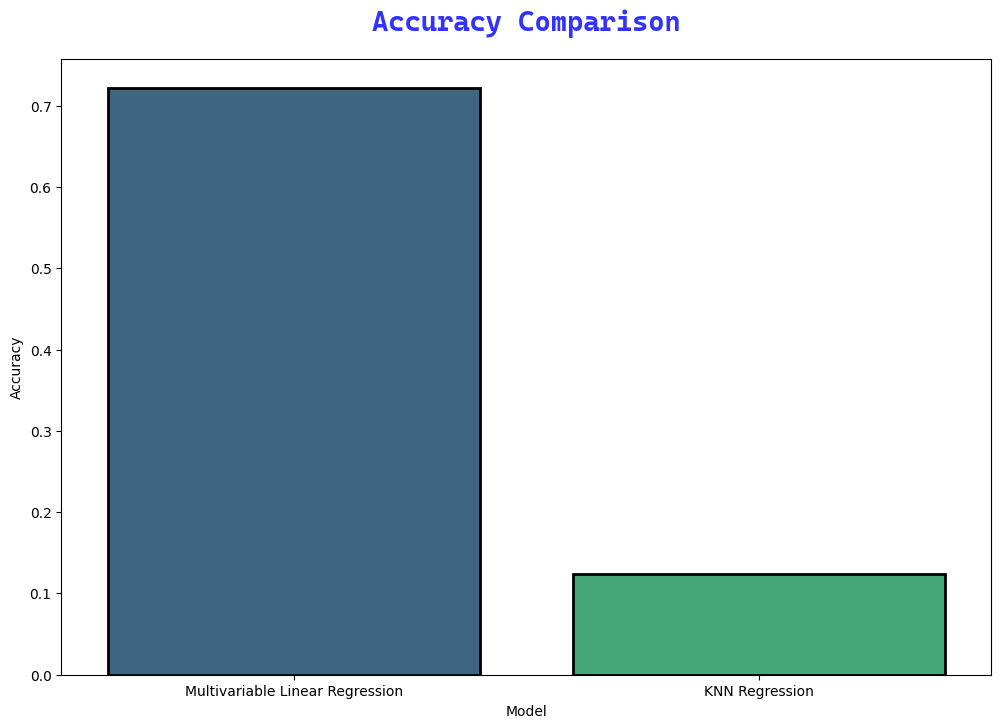

In [277]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'Model', y = 'Accuracy', data = data, palette = 'viridis', edgecolor = 'black', linewidth = 2).set_title('Accuracy Comparison', fontsize = 20, pad = 20, alpha = 0.8, fontname = 'Cascadia Code', fontweight = 'bold', color = 'blue', loc = 'center')

### Mean Squared Error Comparison

Text(0.5, 1.0, 'Mean Squared Error Comparison')

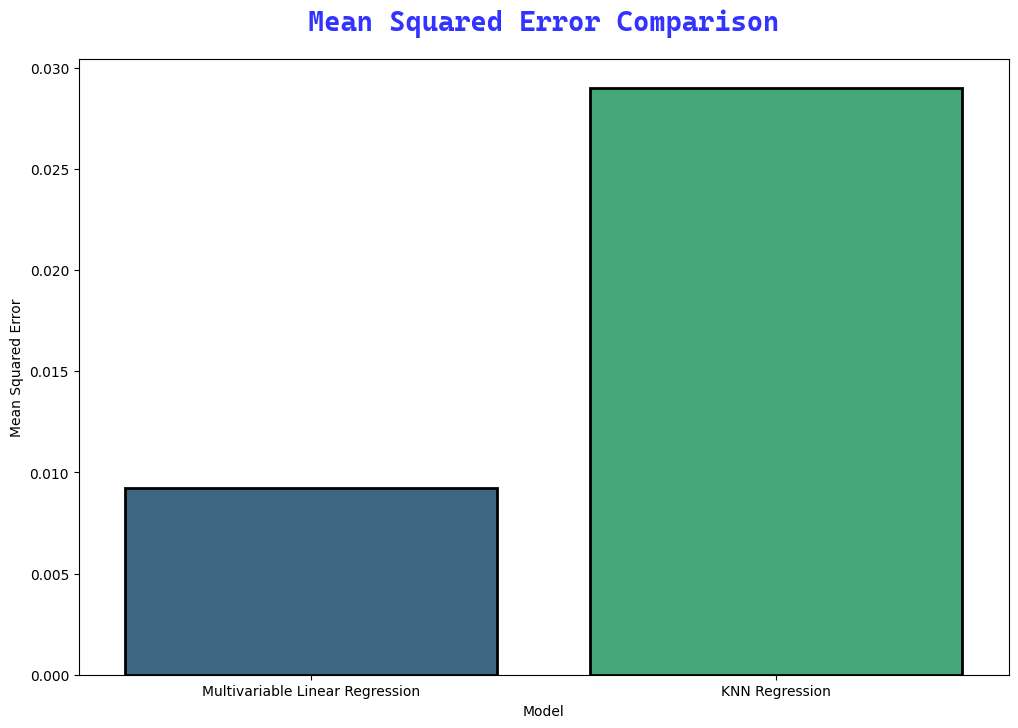

In [278]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'Model', y = 'Mean Squared Error', data = data, palette = 'viridis', edgecolor = 'black', linewidth = 2).set_title('Mean Squared Error Comparison', fontsize = 20, pad = 20, alpha = 0.8, fontname = 'Cascadia Code', fontweight = 'bold', color = 'blue', loc = 'center')

### Mean Absolute Error Comparison

Text(0.5, 1.0, 'Mean Absolute Error Comparison')

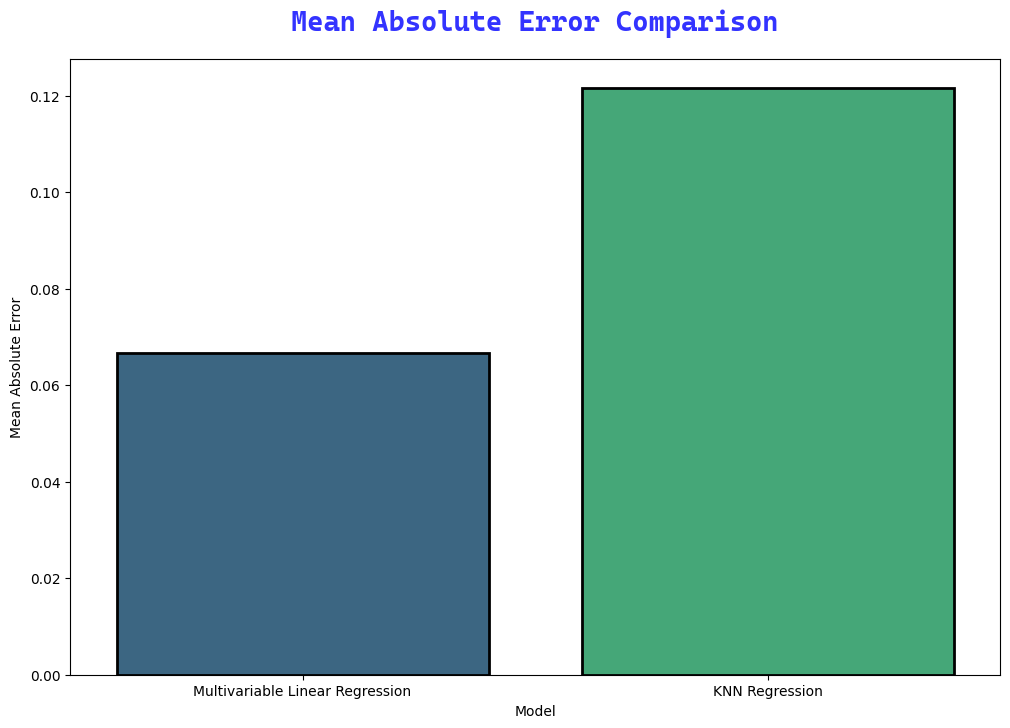

In [279]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'Model', y = 'Mean Absolute Error', data = data, palette = 'viridis', edgecolor = 'black', linewidth = 2).set_title('Mean Absolute Error Comparison', fontsize = 20, pad = 20, alpha = 0.8, fontname = 'Cascadia Code', fontweight = 'bold', color = 'blue', loc = 'center')